# Standard Test Cases

In [6]:
import sys

from traccuracy._tracking_graph import TrackingGraph

sys.path.append("../tests/examples")

import matplotlib.pyplot as plt
import numpy as np
from example_matched_graphs import (
    empty_gt,
    empty_pred,
    fn_edge_matched,
    fn_node_matched,
    fp_edge_matched,
    fp_node_matched,
    good_matched,
    one_to_two,
    two_to_one,
)
from example_segmentations import (
    false_negative_segmentation_2d,
    false_positive_segmentation_2d,
    good_segmentation_2d,
    oversegmentation_2d,
    undersegmentation_2d,
)
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

In [2]:
def get_loc(graph, node):
    return graph.graph.nodes[node]["t"], graph.graph.nodes[node]["y"]


def plot_graph(ax, graph: TrackingGraph, color="black"):
    if graph.graph.number_of_nodes() == 0:
        return 0
    ids = list(graph.graph.nodes)
    x = [graph.graph.nodes[node]["t"] for node in ids]
    y = [graph.graph.nodes[node]["y"] for node in ids]
    ax.scatter(x, y, color=color)
    for _x, _y, _id in zip(x, y, ids):
        ax.text(_x + 0.05, _y + 0.05, str(_id))

    for u, v in graph.graph.edges():
        xs = [graph.graph.nodes[u]["t"], graph.graph.nodes[v]["t"]]
        ys = [graph.graph.nodes[u]["y"], graph.graph.nodes[v]["y"]]
        ax.plot(xs, ys, color=color)

    return max(y)


def plot_matching(ax, matched, color="grey"):
    for u, v in matched.mapping:
        xs = [
            matched.gt_graph.graph.nodes[u]["t"],
            matched.pred_graph.graph.nodes[v]["t"],
        ]
        ys = [
            matched.gt_graph.graph.nodes[u]["y"],
            matched.pred_graph.graph.nodes[v]["y"],
        ]
        ax.plot(xs, ys, color=color, linestyle="dashed")


def plot_matched(examples, title):
    gt_color = "black"
    pred_color = "blue"
    mapping_color = "grey"
    fig, ax = plt.subplots(1, len(examples) + 1, figsize=(3 * len(examples) + 1, 2))
    for i, matched in enumerate(examples):
        axis = ax[i]
        maxY = plot_graph(axis, matched.gt_graph, color=gt_color)
        maxY = max([maxY, plot_graph(axis, matched.pred_graph, color=pred_color)])
        plot_matching(axis, matched, color=mapping_color)
        axis.set_ybound(-0.5, maxY + 0.5)
        axis.set_xbound(-0.5, 2.5)
        axis.set_ylabel("Y Value")
        axis.set_xlabel("Time")

    handles = [
        Patch(color=gt_color),
        Patch(color=pred_color),
        Patch(color=mapping_color),
    ]
    labels = ["Ground Truth", "Prediction", "Mapping"]
    ax[-1].legend(handles=handles, labels=labels, loc="center")
    ax[-1].set_axis_off()
    plt.tight_layout()
    fig.suptitle(title, y=1.05)

## Graph Cases

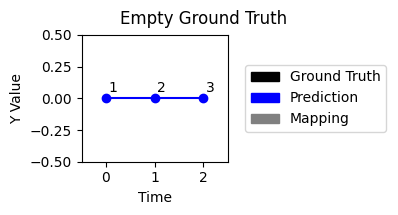

In [42]:
plot_matched([empty_gt()], "Empty Ground Truth")

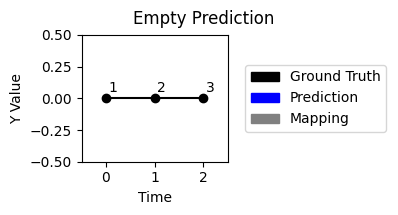

In [48]:
plot_matched([empty_pred()], "Empty Prediction")

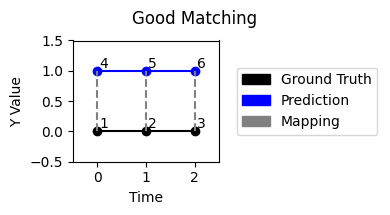

In [49]:
plot_matched([good_matched()], "Good Matching")

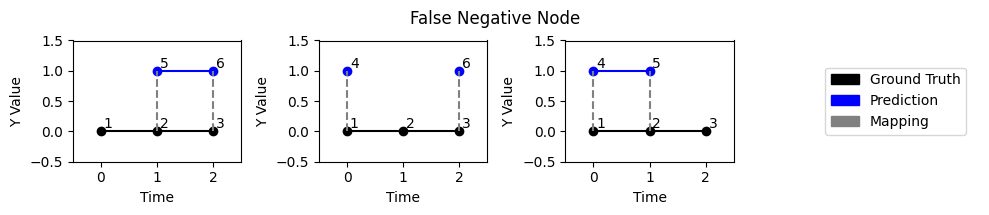

In [45]:
plot_matched([fn_node_matched(t) for t in [0, 1, 2]], "False Negative Node")

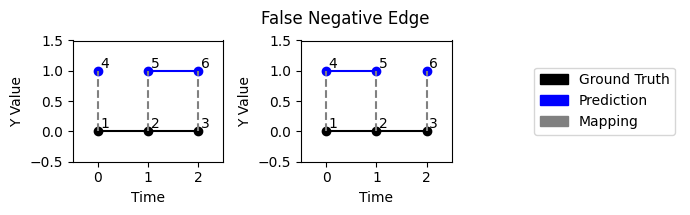

In [46]:
plot_matched([fn_edge_matched(t) for t in [0, 1]], "False Negative Edge")

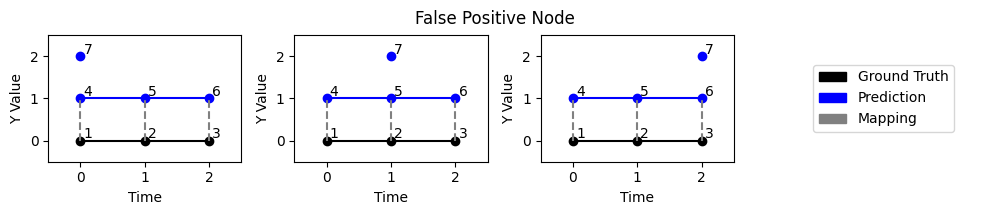

In [47]:
plot_matched([fp_node_matched(t) for t in [0, 1, 2]], "False Positive Node")

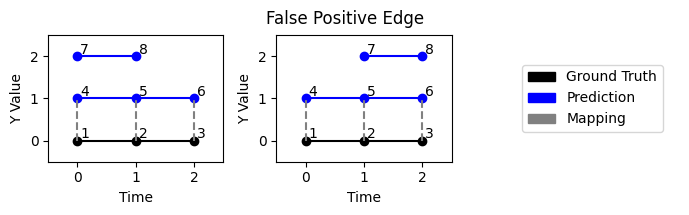

In [50]:
plot_matched([fp_edge_matched(t) for t in [0, 1]], "False Positive Edge")

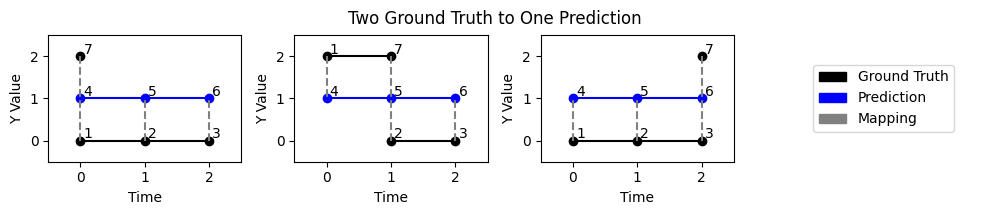

In [51]:
plot_matched([two_to_one(t) for t in [0, 1, 2]], "Two Ground Truth to One Prediction")

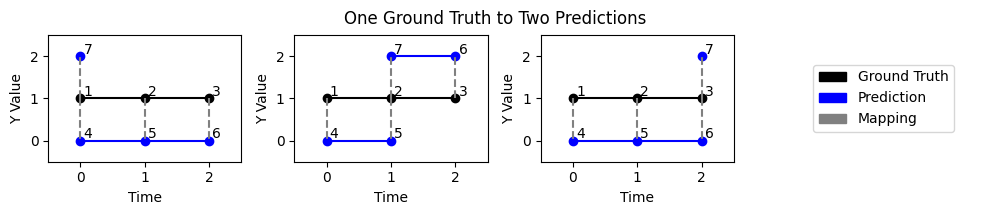

In [52]:
plot_matched([one_to_two(t) for t in [0, 1, 2]], "One Ground Truth to Two Predictions")

## Segmentation Cases

In [16]:
def plot_pair(gt, pred, title):
    max_label = np.max([gt, pred])
    colors = ["black", "red", "blue", "green"]
    colormap = ListedColormap(colors)
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    ax[0].imshow(gt, cmap=colormap, vmax=4)
    ax[0].set_title("Ground Truth")
    # ax[0].set_axis_off()
    ax[1].imshow(pred, cmap=colormap, vmax=4)
    ax[1].set_title("Predicted")

    handles = [Patch(color=colors[i]) for i in range(1, max_label + 1)]
    labels = [str(i) for i in range(1, max_label + 1)]
    ax[1].legend(handles=handles, labels=labels, title="Label IDs", loc="upper right")
    fig.suptitle(title, y=0.9)
    fig.tight_layout()

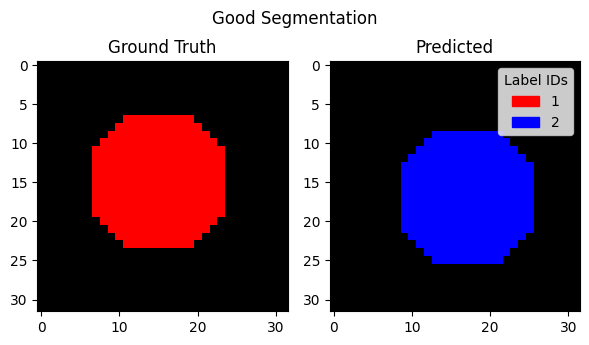

In [17]:
plot_pair(*good_segmentation_2d(), "Good Segmentation")

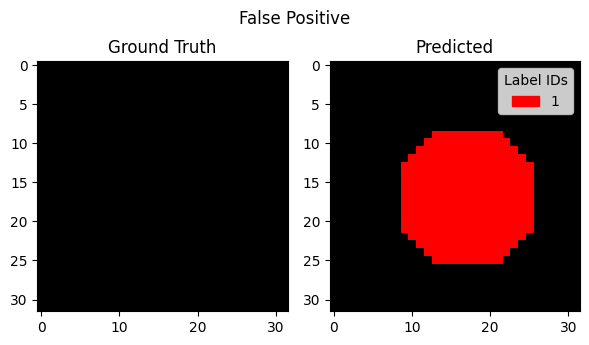

In [18]:
plot_pair(*false_positive_segmentation_2d(), "False Positive")

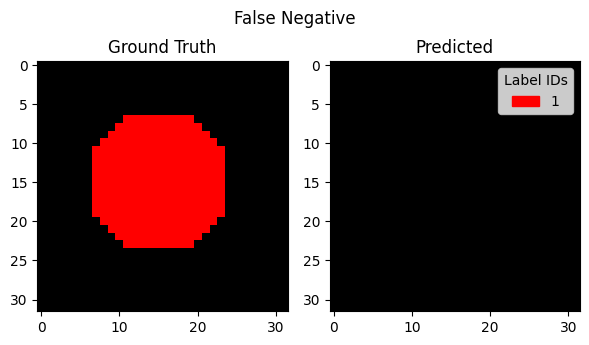

In [19]:
plot_pair(*false_negative_segmentation_2d(), "False Negative")

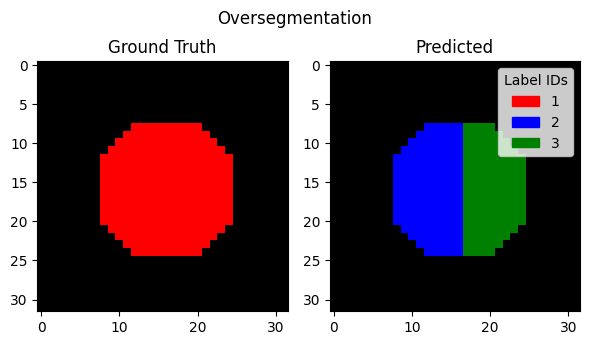

In [21]:
plot_pair(*oversegmentation_2d(), "Oversegmentation")

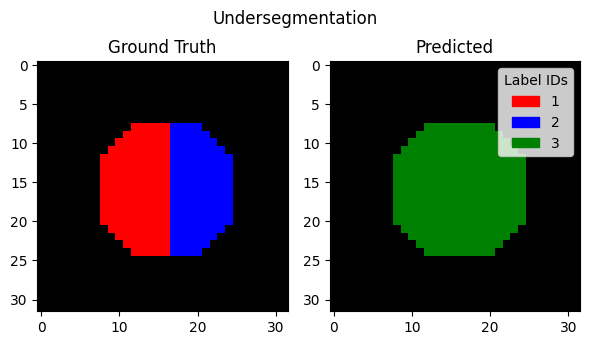

In [22]:
plot_pair(*undersegmentation_2d(), "Undersegmentation")